## 4.2 NLP(ish)

https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html

## décider de comment on découpe
- sentence ?
- paragraphe (existe pas ici) -> mais possible avec wtpsplit : https://github.com/segment-any-text/wtpsplit
- dire que tant pis ?
- faire un check global du nb token par intervention et cut que ce qui dépasse ?
- Passer à l'échelle de la phrase pour tout ce qui va être pour sentiment, réseau de mots, proba des termes, etc.
- etc.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import bertopic
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import spacy
from bertopic.vectorizers import ClassTfidfTransformer

In [2]:
df = pd.read_csv(
    "../data/interim/df_repu.csv", low_memory=False, dtype={"ID_orateur": str}
)

In [3]:
df["DateSeance_ts"] = pd.to_datetime(df["DateSeance"], format="%Y%m%d%H%M%S%f")
df["DateSeance_day"] = df["DateSeance_ts"].dt.normalize()  # guess it works


## Bert things

In [39]:
########
## Si besoin, revenir au plus simple :
########

nltk.download("stopwords")
french_stopwords = list(set(stopwords.words("french")))
vectorizer_model = CountVectorizer(stop_words=french_stopwords)
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

topic_model = bertopic.BERTopic(language="french", vectorizer_model=vectorizer_model, embedding_model=embedding_model)
topics, probs = topic_model.fit_transform(df["Texte_clean"])

[nltk_data] Downloading package stopwords to /Users/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save("model_dir", serialization="safetensors", save_embedding_model=embedding_model)
# Load from directory
# loaded_model = BERTopic.load("model_dir")

In [ ]:
# TODO: redo with the good sentencetransformer

Stopwords :
- https://maartengr.github.io/BERTopic/getting_started/tips_and_tricks/tips_and_tricks.html#document-length
- Instead, we can use the CountVectorizer to preprocess our documents after having generated embeddings and clustered our documents. Personally, I have found almost no disadvantages to using the CountVectorizer to remove stopwords and it is something I would strongly advise to try out:
- We can also use the ClassTfidfTransformer to reduce the impact of frequent words. The end result is very similar to explicitly removing stopwords but this process does this automatically:

In [ ]:
# # tester un truc autour de alibaba pour l'embedding ?

# model_name_or_path="Alibaba-NLP/gte-multilingual-base"

In [ ]:
# TODO: Tester Flaubert et autres. ALibaba = cry in GPU


In [ ]:
# # vectorizer_model et french stopwords
# # Avec spacy
# nlp = spacy.load("fr_core_news_sm")
# french_stopwords = list(nlp.Defaults.stop_words)
# vectorizer_model = CountVectorizer(stop_words=french_stopwords)

# # # Ou avec nltk
# # import nltk
# # from nltk.corpus import stopwords
# # nltk.download("stopwords")
# # french_stopwords = list(set(stopwords.words("french")))
# # vectorizer_model = CountVectorizer(stop_words=french_stopwords)


# #####################################
# # TODO: Choisir le modèle d'embedding final
# #####################################
# # "dangvantuan/sentence-camembert-large"
# # "all-MiniLM-L6-v2"


# embedding_model = SentenceTransformer(
#     # "Alibaba-NLP/gte-multilingual-base", trust_remote_code=True # cry in gpu, something wrong ?
#     "dangvantuan/sentence-camembert-large"
#     # "all-MiniLM-L6-v2" # celui par défaut ?
# )

# print(
#     "device used :", embedding_model.device
# )  # Vérifie si le modèle est sur GPU ou CPU

# # ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# # créer le modèle
# topic_model = BERTopic(
#     embedding_model=embedding_model,
#     vectorizer_model=vectorizer_model,  # remove stopwords after embbedings
#     # ctfidf_model=ctfidf_model, # (or) reduce the impact of frequent word
# )

No sentence-transformers model found with name dangvantuan/sentence-camembert-large. Creating a new one with MEAN pooling.


device used : mps:0


In [ ]:
# # Fiter le modèle
# topics, probs = topic_model.fit_transform(
#     df["Texte_clean"]
# )  # .tolist() ? pas obligatoire ?

In [ ]:
# # V1 safetensors
# topic_model.save(
#     "../models/bert/camembert_safetensors",
#     serialization="safetensors",
#     save_ctfidf=True,
#     save_embedding_model=embedding_model,
# )

# # V2 pytorch
# topic_model.save(
#     "../models/bert/camembert_pytorch",
#     serialization="pytorch",
#     save_ctfidf=True,
#     save_embedding_model=embedding_model,
# )

# # V3 pickle (pas recommandé ?)
# topic_model.save("../models/bert/############", save_embedding_model=True)


In [ ]:
# Load from directory
embedding_model = SentenceTransformer("dangvantuan/sentence-camembert-large")

topic_model = BERTopic.load("../models/bert/modele_bert_camenbert_large_mean_pooling")
# topic_model.embedding_model = embedding_model
# topics, probs = topic_model.transform(df["Texte_clean"])

No sentence-transformers model found with name dangvantuan/sentence-camembert-large. Creating a new one with MEAN pooling.


In [ ]:
# TODO: does mean pooling thing really works ?

Pour "dangvantuan/sentence-camembert-large"
- No sentence-transformers model found with name dangvantuan/sentence-camembert-large. Creating a new one with MEAN pooling.
- https://github.com/UKPLab/sentence-transformers/issues/2779 In short: even with a will create a new model with mean pooling warning, your model uses the tokenizer from https://huggingface.co/dangvantuan/sentence-camembert-large.


DOES IT REALLY WORKS ?

In [ ]:
# help(topic_model)

In [27]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1212,-1_république_qu_loi_avez,"[république, qu, loi, avez, contre, été, minis...","[J’entends vos protestations, chers collègues ..."
1,0,188,0_étrangers_immigration_asile_intégration,"[étrangers, immigration, asile, intégration, e...",[…redonnez du sens à une politique qui n’en a ...
2,1,152,1_élèves_école_éducation_enseignants,"[élèves, école, éducation, enseignants, enseig...","[Merci, mesdames et messieurs les députés, de ..."
3,2,122,2_république_sommes_valeurs_français,"[république, sommes, valeurs, français, compro...","[Cette réalité nous invite tous, à la modestie..."
4,3,116,3_laïcité_école_élèves_uniforme,"[laïcité, école, élèves, uniforme, religieux, ...",[…qui enseignent des matières fondamentales te...
...,...,...,...,...,...
68,67,11,67_aimez_aiment_république_rance,"[aimez, aiment, république, rance, aimait, dét...","[Et vous, vous n’aimez pas la République !, Vo..."
69,68,11,68_promesse_dignité_siècles_précaires,"[promesse, dignité, siècles, précaires, corres...",[Vous n’avez cessé de proclamer qu’à des droit...
70,69,11,69_biens_restitution_spoliés_culturels,"[biens, restitution, spoliés, culturels, resti...",[Je m’exprime au nom de notre collègue Claudia...
71,70,11,70_soustraire_religion_origine_prévaloir,"[soustraire, religion, origine, prévaloir, loi...","[Ils sont partis, en effet. Nous nous targuons..."


In [28]:
# Optional: visualize
fig_topic_distance_map = topic_model.visualize_topics()
fig_topic_distance_map

In [ ]:
# fig_topic_distance_map.write_html("../reports/figs/topic_distance_map.html")

In [29]:
table_topic = topic_model.get_topic_info()
table_topic[:20]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1212,-1_république_qu_loi_avez,"[république, qu, loi, avez, contre, été, minis...","[J’entends vos protestations, chers collègues ..."
1,0,188,0_étrangers_immigration_asile_intégration,"[étrangers, immigration, asile, intégration, e...",[…redonnez du sens à une politique qui n’en a ...
2,1,152,1_élèves_école_éducation_enseignants,"[élèves, école, éducation, enseignants, enseig...","[Merci, mesdames et messieurs les députés, de ..."
3,2,122,2_république_sommes_valeurs_français,"[république, sommes, valeurs, français, compro...","[Cette réalité nous invite tous, à la modestie..."
4,3,116,3_laïcité_école_élèves_uniforme,"[laïcité, école, élèves, uniforme, religieux, ...",[…qui enseignent des matières fondamentales te...
5,4,81,4_49_ve_censure_assemblée,"[49, ve, censure, assemblée, majorité, finance...","[Cinq 49.3 en un peu moins de sept semaines, c..."
6,5,77,5_santé_soins_hôpital_médecins,"[santé, soins, hôpital, médecins, soignants, s...",[Personne n’ignore la situation catastrophique...
7,6,74,6_mer_territoires_ultramarins_prix,"[mer, territoires, ultramarins, prix, eau, hex...",[Or la République refuse l’assignation à résid...
8,7,64,7_antisémitisme_israël_haine_antisémites,"[antisémitisme, israël, haine, antisémites, ju...","[Après la Shoah, on pensait que la bête avait ..."
9,8,59,8_policiers_ordre_gendarmes_police,"[policiers, ordre, gendarmes, police, forces, ...","[Monsieur Taverne, vous avez rappelé avec rais..."


In [ ]:
# table_topic.to_csv("../data/interim/table_topics.csv", index=False)

In [30]:
df["Topic"] = topics

NameError: name 'topics' is not defined

In [ ]:
# import csv

# df.to_csv("../data/interim/df_repu_with_topics.csv", index=False, quoting=csv.QUOTE_ALL)

## Dynamic topic model

* `global_tuning`
  * Whether to average the topic representation of a topic at time *t* with its global topic representation
* `evolution_tuning`
  * Whether to average the topic representation of a topic at time *t* with the topic representation of that topic at time *t-1*
* `nr_bins`
  * The number of bins to put our timestamps into. It is computationally inefficient to extract the topics at thousands of different timestamps. Therefore, it is advised to keep this value below 20.


In [31]:
topics_over_time = topic_model.topics_over_time(
    docs=df["Texte_clean"],
    timestamps=df["DateSeance_ts"],
    global_tuning=True,
    evolution_tuning=True,
    nr_bins=20,
)

In [32]:
fig_dynamic_topic = topic_model.visualize_topics_over_time(
    topics_over_time, top_n_topics=10
)
fig_dynamic_topic

In [12]:
fig_dynamic_topic.write_html("../reports/figs/dynamic_topics.html")

## Hierarchical topics

In [13]:
hierarchical_topics = topic_model.hierarchical_topics(df["Texte_clean"])

100%|██████████| 71/71 [00:00<00:00, 700.75it/s]


In [33]:
fig_hierarchical = topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)
fig_hierarchical

In [34]:
fig_hierarchical.write_html("../reports/figs/hierarchical_topics.html")

In [35]:
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

.
├─république_républicain_arc_républicains_honte
│    ├─républicain_arc_républicains_république_grâce
│    │    ├─■──arc_républicain_sortir_étonnement_situerait ── Topic: 58
│    │    └─républicain_républicains_république_grâce_iiie
│    │         ├─■──républicain_république_iiie_ordre_barrage ── Topic: 16
│    │         └─■──républicains_grâce_républicain_attachées_espèrent ── Topic: 40
│    └─république_honte_ve_aimez_vie
│         ├─république_honte_ve_vie_êtes
│         │    ├─■──république_honte_êtes_détruisant_détruisez ── Topic: 20
│         │    └─■──ve_république_vie_présidente_pen ── Topic: 30
│         └─■──aimez_aiment_république_rance_aimait ── Topic: 67
└─qu_république_loi_été_france
     ├─qu_loi_république_france_bien
     │    ├─calédonie_nouvelle_49_ve_république
     │    │    ├─droite_extrême_gauche_peur_histoire
     │    │    │    ├─■──extrême_droite_immigration_peur_ennemi ── Topic: 71
     │    │    │    └─■──droite_extrême_gauche_histoire_dos ── Topic: 39
    

## Topic reduction

In [ ]:
# topics_to_merge = [[X, Y],
#                    [Z, W]]
# topic_model.merge_topics(df["Texte_clean"], topics_to_merge)

In [ ]:
# DONT : # topic_model.reduce_topics(df["Texte_clean"], nr_topics=40) # DONT, IT NUKES THE TOPICS IN MODEL
# # Access updated topics
# topics = topic_model.topics_

2025-07-02 18:46:30,812 - BERTopic - Topic reduction - Reducing number of topics
2025-07-02 18:46:30,813 - BERTopic - Topic reduction - Reduced number of topics from 20 to 20


### Topics per class

In [ ]:
df.columns

Index(['UID', 'SeanceRef', 'SessionRef', 'DateSeance', 'DateSeanceJour',
       'NumSeanceJour', 'NumSeance', 'TypeAssemblee', 'Legislature', 'Session',
       'NomFichierJO', 'President', 'Titre_general', 'Sous_titre',
       'Contexte_hierarchique', 'Section_courante', 'Sujet_point',
       'Valeur_ODJ', 'Point_ID', 'Point_type', 'ID_paragraphe', 'Ordre_seance',
       'Code_grammaire', 'Code_style', 'Code_parole', 'Role_debat',
       'Nom_orateur', 'Qualite_orateur', 'ID_orateur', 'stime', 'Texte',
       'Source_extraction', 'len_dirtytext', 'legislatureLast', 'civ', 'nom',
       'prenom', 'villeNaissance', 'naissance', 'age', 'groupe', 'groupeAbrev',
       'departementNom', 'departementCode', 'circo', 'datePriseFonction',
       'job', 'mail', 'twitter', 'facebook', 'website', 'nombreMandats',
       'experienceDepute', 'scoreParticipation',
       'scoreParticipationSpecialite', 'scoreLoyaute', 'scoreMajorite',
       'active', 'dateMaj', 'Texte_clean', 'repu_match_valide',
  

In [36]:
# ATTENTION, PLANTAIT À CAUSE DES NA
df["groupeAbrev"] = df["groupeAbrev"].fillna("gouv_TEMP")

topics_per_class = topic_model.topics_per_class(
    df["Texte_clean"], classes=df["groupeAbrev"]
)

In [37]:
fig_topics_per_class = topic_model.visualize_topics_per_class(
    topics_per_class, top_n_topics=10
)
fig_topics_per_class

In [ ]:
fig_topics_per_class.write_html("../reports/figs/topics_per_class.html")

In [ ]:
# revoir Topic distribution

In [ ]:
df.shape

(3668, 64)

In [3]:
import pandas as pd
df = pd.read_csv(
    "../data/interim/df_repu_with_topics.csv", low_memory=False, dtype={"ID_orateur": str}
)

In [4]:
df["Texte_clean_len"] = df["Texte_clean"].str.len()

In [5]:
df["Texte_clean_len"].describe()

count     3668.000000
mean      1455.530807
std       1701.023067
min         18.000000
25%        409.750000
50%        926.000000
75%       1856.000000
max      20908.000000
Name: Texte_clean_len, dtype: float64

In [7]:
df.groupby(["Topic"])["Texte_clean_len"].describe()

,count,mean,std,min,25%,50%,75%,max
Topic,,,,,,,,
-1,1212.0,1213.323432,1402.789365,19.0,362.00,735.5,1507.50,12292.0
0,188.0,1495.755319,1600.531818,89.0,568.75,991.5,1797.50,11413.0
1,152.0,1687.151316,1615.244384,80.0,563.00,1235.5,2242.50,11244.0
2,122.0,553.385246,857.750570,75.0,187.25,294.0,536.25,6924.0
3,116.0,1172.077586,1756.965072,53.0,340.50,744.0,1402.00,14609.0
...,...,...,...,...,...,...,...,...
67,11.0,56.090909,39.454922,26.0,32.00,41.0,67.00,162.0
68,11.0,494.090909,339.362182,134.0,268.00,328.0,653.50,1246.0
69,11.0,3483.181818,1844.537385,364.0,2207.50,4267.0,4620.50,5909.0


In [10]:
minus_one = df[df["Topic"] == -1]

<Axes: >

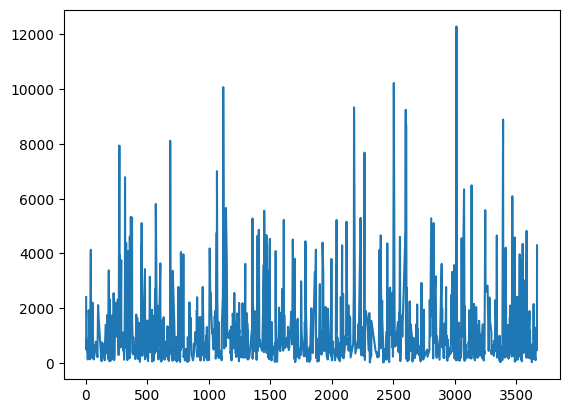

In [12]:
minus_one["Texte_clean_len"].plot()